<a href="https://colab.research.google.com/github/AbdulellahMoj/AI-Lab/blob/main/LinearRegression_CarbonEmissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task: Predict Carbon Emissions Based on Satellite Observations

* You are provided with a time series satellite observations dataset extracted from Sentinel-5P satelite from 2019 to 2021.

* Your objective is to build a regression model that accurately predicts the amount of carbon emissions in the next years.

* Your target is the column: "emission".

* You are provided with the code to download and load the csv file.

* Your work will be evaluated based on the completion of the given tasks below.

* You are allowed to use any models or libraries you want.
    
---


In [2]:
import kagglehub
import os
import pandas as pd

path = kagglehub.dataset_download("mohammad2012191/q3-data")

print("Path to dataset files:", path)

csv_path = os.path.join(path, "train.csv")

data = pd.read_csv(csv_path)
data.head()

100%|██████████| 37.6M/37.6M [00:00<00:00, 39.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mohammad2012191/q3-data/versions/1


,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile


In [4]:
data.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

# EDA & Preprocessing

1. Drop the ID feature (ID_LAT_LON_YEAR_WEEK):

In [6]:
# 1. TODO
data = data.drop("ID_LAT_LON_YEAR_WEEK",axis =1)

2. Check for the missing values and handle them.


In [7]:
# 2. TODO
def check_missing_values(df):
    missing_values = df.isnull().sum()
    print("Missing Values per Column:")
    print(missing_values[missing_values > 0])
    if missing_values.any():
        print("\nHandle Missing Values as needed.")
    else:
        print("\nNo Missing Values Found.")

check_missing_values(data)

Missing Values per Column:
SulphurDioxide_SO2_column_number_density          14609
SulphurDioxide_SO2_column_number_density_amf      14609
SulphurDioxide_SO2_slant_column_number_density    14609
SulphurDioxide_cloud_fraction                     14609
SulphurDioxide_sensor_azimuth_angle               14609
                                                  ...  
Cloud_surface_albedo                                484
Cloud_sensor_azimuth_angle                          484
Cloud_sensor_zenith_angle                           484
Cloud_solar_azimuth_angle                           484
Cloud_solar_zenith_angle                            484
Length: 70, dtype: int64

Handle Missing Values as needed.


In [8]:
data['Cloud_sensor_azimuth_angle'].fillna(data['Cloud_sensor_azimuth_angle'].mean(), inplace=True)
data['Cloud_sensor_zenith_angle'].fillna(data['Cloud_sensor_zenith_angle'].mean(), inplace=True)
data['Cloud_solar_azimuth_angle'].fillna(data['Cloud_solar_azimuth_angle'].mean(), inplace=True)
data['Cloud_solar_zenith_angle'].fillna(data['Cloud_solar_zenith_angle'].mean(), inplace=True)
data['SulphurDioxide_SO2_column_number_density'].fillna(data['SulphurDioxide_SO2_column_number_density'].mean(), inplace=True)


<ipython-input-8-5e9d5dacfe9b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Cloud_sensor_azimuth_angle'].fillna(data['Cloud_sensor_azimuth_angle'].mean(), inplace=True)
<ipython-input-8-5e9d5dacfe9b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

In [27]:
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
latitude                                    0
longitude                                   0
year                                        0
week_no                                     0
SulphurDioxide_SO2_column_number_density    0
                                           ..
Cloud_sensor_zenith_angle                   0
Cloud_solar_azimuth_angle                   0
Cloud_solar_zenith_angle                    0
emission                                    0
Location                                    0
Length: 76, dtype: int64


3. Plot the "emission" histogram.

(array([7.6872e+04, 1.8310e+03, 1.0800e+02, 2.5000e+01, 1.0000e+00,
        1.0000e+01, 5.9000e+01, 9.0000e+01, 8.0000e+00, 1.9000e+01]),
 array([   0.    ,  316.7768,  633.5536,  950.3304, 1267.1072, 1583.884 ,
        1900.6608, 2217.4376, 2534.2144, 2850.9912, 3167.768 ]),
 <BarContainer object of 10 artists>)

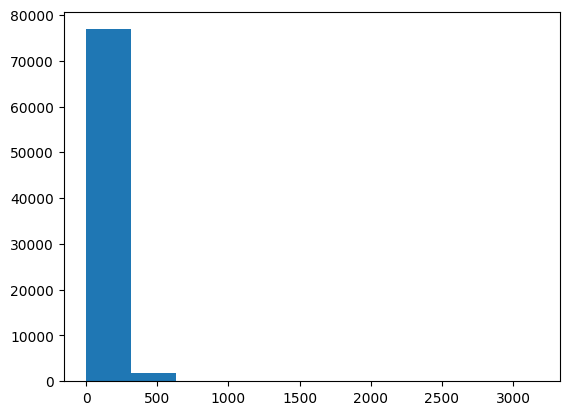

In [10]:
# 3. TODO
plt.hist(data["emission"])

4. Plot the "latitude" and "longitude" using a scatter plot then colorize the points using the "emission" column.

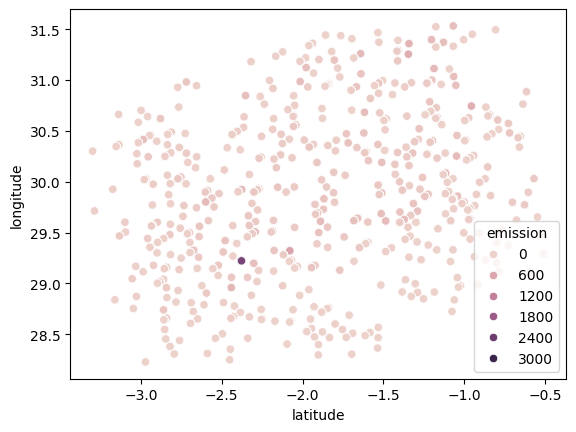

In [11]:
# 4. TODO
sns.scatterplot(x= data["latitude"], y = data["longitude"],hue = data["emission"])
plt.show()

# Feature engineering

1. Add a new feature representing "Location" (To do that, you should convert "longitude" and "latitude" features to string type, concatenate them and add the result as a new feature).

In [12]:
# 1. TODO
data["Location"] = data["longitude"].astype(str) + data["latitude"].astype(str)
data.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,Location
0,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994,29.29-0.51
1,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176,29.29-0.51
2,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381,29.29-0.51
3,-0.51,29.29,2019,3,0.000048,NaN,NaN,NaN,NaN,NaN,...,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286,29.29-0.51
4,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317,29.29-0.51


2. Add one aggregation feature representing the average emissions per location (You should groupby "Location" feature and take mean of the "emission", then merge the result to the data)

In [13]:
# 2. TODO
agg = pd.DataFrame( data.groupby("Location")["emission"].mean())
agg=agg['emission'].rename("avg_emis_per_loc",inplace=True)
agg = pd.DataFrame(agg)


In [14]:
agg = pd.DataFrame(agg)
agg.reset_index(inplace=True)
avg_emis_per_locaction = agg["avg_emis_per_loc"]



In [15]:
data.fillna(0.5,inplace = True)

3. Use Label encoder to encode all the categorical features

In [16]:
# 3. TODO
from sklearn.preprocessing import LabelEncoder

categorical_cols = data.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    print(f"Encoding column: {col}")
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
data

Encoding column: Location


,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,Location
0,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994,129
1,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176,129
2,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381,129
3,-0.510,29.290,2019,3,0.000048,0.500000,0.500000,0.500000,0.500000,0.500000,...,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286,129
4,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,55.988022,...,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171,330
79019,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,19.435339,...,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497,330
79020,-3.299,30.301,2021,50,0.000048,0.500000,0.500000,0.500000,0.500000,0.500000,...,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205,330
79021,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,32.599393,...,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792,330


# Modeling

### Baseline:

# *1*. Create a baseline using the "emission" median and calculate MAE score.

In [17]:
baseline = np.median(data["emission"])


In [18]:
X = data.drop("emission",axis = 1)
y = data["emission"]

2. Perform a Time-Based Train-Test Split:
  * You will use the "year" column to split data manually using pandas.
  * Use all samples from 2019 and 2020 as the training set.
  * Use all samples from 2021 as the validation set.
  * Construct X_train, X_valid, y_train, y_valid

In [19]:
train = data[(data["year"] >= 2019) & (data["year"] <=2020)]
test = data[data["year"] == 2021]

In [20]:
X_Train = train.drop(columns=["emission"])
Y_Train = train["emission"]
X_test = test.drop(columns=["emission"])
Y_test = test["emission"]

3. Train a LGBMRegressor on the training data.

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. TODO
baseline_pred = np.full_like(y, y.mean())

# Evaluate the baseline
baseline_mae = mean_absolute_error(y, baseline_pred)
baseline_sqrt = np.sqrt(mean_squared_error(y, baseline_pred))

print(f"Baseline MAE (using mean target): {baseline_mae:.4f}")
print(f"Baseline RMSE (using mean target): {baseline_sqrt:.4f}")

Baseline MAE (using mean target): 73.3308
Baseline RMSE (using mean target): 144.2987


In [22]:
# 2. TODO



In [23]:
# 3. TODO
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error


model = LGBMRegressor(verbose=-1)


scores_mae = []
scores_rmse = []

    # 5-Fold cross-validation
for train_index, test_index in KFold(n_splits=5).split(X, y):
        # Split data into training and testing sets
  X_Train, X_Test = X.loc[train_index,:], X.loc[test_index,:]
  y_Train, y_Test = y[train_index], y[test_index]
        # Train the model
  model.fit(X_Train, y_Train)
        # Predict on the test set
  y_pred = model.predict(X_Test)
        # Calculate metrics
  scores_mae.append(mean_absolute_error(y_Test, y_pred))
  scores_rmse.append(np.sqrt(mean_squared_error(y_Test, y_pred)))
    # Print the results
print(f"MAE Score: {np.mean(scores_mae)}")
print(f"RMSE Score: {np.mean(scores_rmse)}\n")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


MAE Score: 84.90543966043961
RMSE Score: 178.92005357814693



4. Evaluate the Model on the validation data Using MAE

In [24]:
# 4. TODO
# Predict on the test set
y_pred = model.predict(X_test)
        # Calculate metrics
scores_mae.append(mean_absolute_error(Y_test, y_pred))
    # Print the results
print(f"MAE Score: {np.mean(scores_mae)}")

MAE Score: 75.03082347814028




```
`# This is formatted as code`
```

5. Plot the features importance of your model.

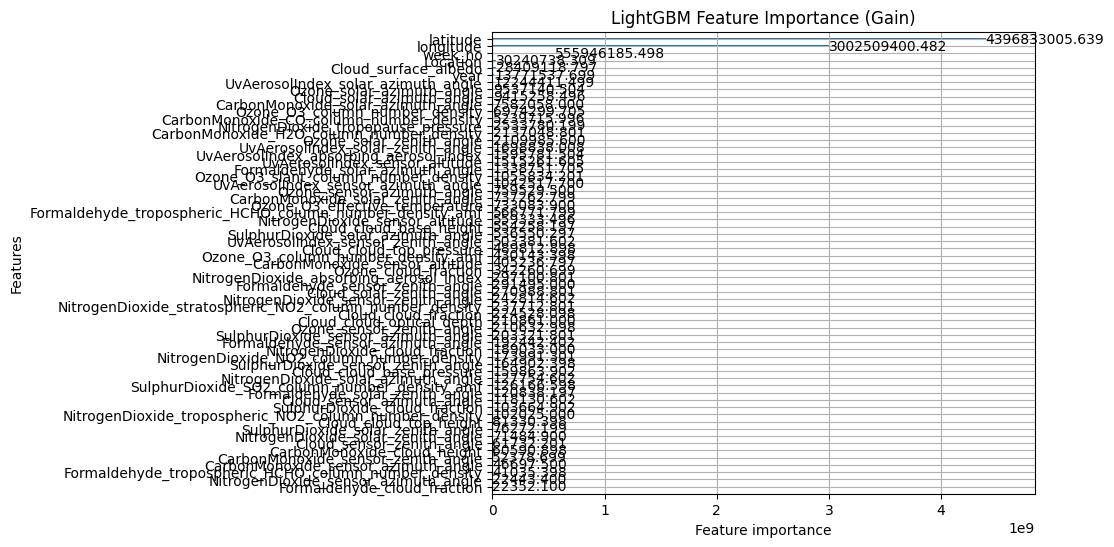

In [25]:
import lightgbm
from lightgbm import LGBMRegressor

lightgbm.plot_importance(model, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain)")
plt.show()

6. Plot the validation predictions using a histogram.

Text(0, 0.5, 'Emission')

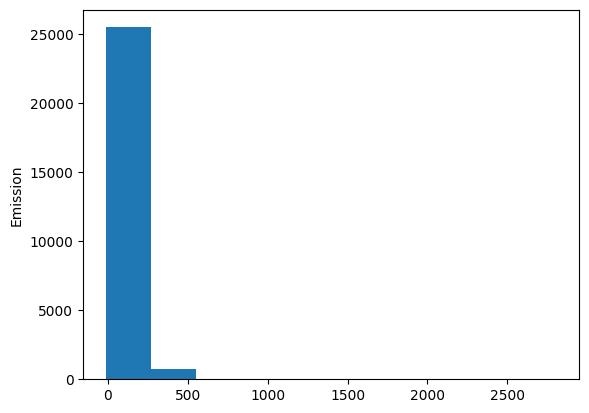

In [26]:
# 6. TODO
plt.hist(y_pred)
plt.ylabel('Emission')

thanks to: Mohamed Eltayeb
